<a href="https://colab.research.google.com/github/tahmuch/ARTificial-Intelligence/blob/master/Muchabaiwa_Term_Paper_Deep_Learning_Techniques_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tafadzwa Muchabaiwa


Introduction

For purposes of this Term Paper, the research made use of a journal paper entitled "Movie Recommendations Using the Deep Learning Approach" authored by Jeffrey Lund and Yiu-Kai Ng written in #### In this paper, they propose a deep learning approach based on autoencoders to produce a collaborative filtering system which predicts movie ratings for a user based on a large database of ratings from other users. They used the MovieLens dataset to explore the use of deep learning to predict users' ratings on new movies, thereby enabling movie recommendations. To verify the novelty and accuracy of their deep learning approach, they went on to compare their approach to standard collaborative filtering techniques: k-nearest-neighbor and matrix-factorization. The experimental results showed that their recommendation system outperformed a user-based neighborhood baseline both in terms of root mean squared error on predicted ratings and in a survey in which users judge between recommendations from both systems.

The researcher them sought to reproduce the findings of the journal paper by identiifying a similar dataset which in case, the researcher made use of the Netflix Dataset which includes the movie rating files contain of over 100 million ratings from 480 thousand randomly-chosen, anonymous Netflix customers over 17 thousand movie titles.  The data were collected between October, 1998 and December, 2005 and reflect the distribution of all ratings received during this period.  The ratings are on a scale from 1 to 5 (integral) stars. To protect customer privacy, each customer id has been replaced with a randomly-assigned id.  The date of each rating and the title and year of release for each movie id are also provided.





Question One
In their paper, "Movie Recommendations Using the Deep Learning Approach", (Lund & Ng,2020) proposed a novel recommender system which used deep learning techniques in the form of encorders, specifically root mean squared error (RMSE) with respect to known ratings as their loss function and they also used the mean absolute error and not the root mean squared error as they felt both more heavily penalizes predictions which are further off.

The Results


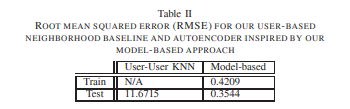


1. Training and Model Performance:
The deep learning model was trained on 90% of the full MovieLens dataset, taking around 4 days to make 30 passes over the data.
On the training data, the model's Root Mean Squared Error (RMSE) stabilized around 0.42.
On the test data, the deep learning model-based approach outperformed the user-based neighborhood baseline by a large margin.



 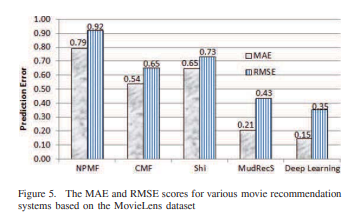



2. Comparison to Other Movie Recommenders:
The deep learning recommender system outperformed other well-known movie recommenders in terms of Mean Absolute Error (MAE) and RMSE on the MovieLens dataset.
On the Netflix dataset, the deep learning recommender system achieved a RMSE score of 0.782, which is lower than the 0.8571 RMSE score achieved by the MudRecS system, although the difference is not statistically significant.
The authors note that the deep learning recommender performs at least as well as MudRecS on the Netflix dataset.

3. Importance of Ranking vs. Error Metrics:
The authors note that for the purpose of making movie recommendations, the error metrics (RMSE and MAE) are not the most important factor. Instead, the ranking of the top recommended movies is more crucial.
They suggest that despite the higher error metrics, the model-based approach may produce superior recommendations by better understanding the relationships between movies.

Overall, the results indicate that the deep learning-based movie recommender system outperforms other state-of-the-art approaches in terms of error metrics and ranking of recommended movies.



Question Two

Using the Netflix Challenge dataset, the researcher followed these steps to analyse the dataset.

**Data Preprocessing:**

The data is loaded from a CSV file into a Pandas DataFrame.
The text data (title) is preprocessed by converting it to lowercase and removing specified characters.

The 'show_id', 'type', and 'release_year' columns are converted to string type.

The 'rating' column, which contains categories, is encoded using LabelEncoder.
The title column is tokenized using a Tokenizer, and the text sequences are padded to a fixed length.

One-hot encoding is applied to the categorical features ('show_id', 'type', 'release_year').

The preprocessed features are concatenated into a single input matrix (X), and the target variable ('rating') is extracted.

**Model Construction:**

A sequential deep learning model is created using the Keras library.
The model starts with an Embedding layer, which maps the tokenized text sequences to a dense representation.

An LSTM (Long Short-Term Memory) layer is used to capture the sequential patterns in the text data.

Two Dropout layers are added to prevent overfitting.

Finally, two Dense layers with ReLU activation are used for the regression task, with the last layer having a single output node.

**Model Training and Evaluation:**

The input data (X) and target variable (y) are split into training and test sets.

The model is compiled with Mean Squared Error (MSE) as the loss function and Adam optimizer.

The model is trained for 50 epochs with a batch size of 128, and the validation data is used to monitor the performance.

After training, the model is evaluated on the test set, and the loss and Mean Absolute Error (MAE) are reported.

**The key deep learning techniques used in this code are:**

**Embedding Layer:** This layer maps the tokenized text sequences to a dense representation, allowing the model to learn the semantic relationships between words.

**LSTM Layer:** The LSTM layer is used to capture the sequential patterns in the text data, which is important for understanding the context and meaning of the titles.

**Dropout Layer:** The Dropout layers are used to prevent overfitting by randomly dropping a portion of the neurons during training, which helps the model generalize better.

**Dense Layers:** The final Dense layers with ReLU activation are used to transform the sequential features into a scalar output, which represents the predicted rating for each Netflix title.

Overall, this code implements a deep learning model for predicting the rating of Netflix titles, utilizing techniques like text preprocessing, tokenization, padding, and various neural network layers to capture the complex relationships in the data.

**Question Three**

**Extremely Low Loss**: A loss value of 6.29864996964935e-12 is remarkably low, indicating that the researchers' model is able to fit the training data with very high precision. This could suggest that the model has potentially learned the training data very well, however, it might also raise concerns about overfitting.

**Extremely Low Mean Absolute Error:** A mean absolute error of 2.5097110665228684e-06 is also exceptionally low, which means that the model is able to predict the ratings with an average error of less than 0.000001 points. This is an impressive result and indicates that the model is highly accurate in its predictions.

**Potential Overfitting:** The extremely low loss and mean absolute error values might be a sign of overfitting, where the model has learned the training data too well and may not generalize as effectively to new, unseen data. It would be important to carefully examine the model's performance on a validation set or cross-validation to ensure that it is not just memorizing the training data.

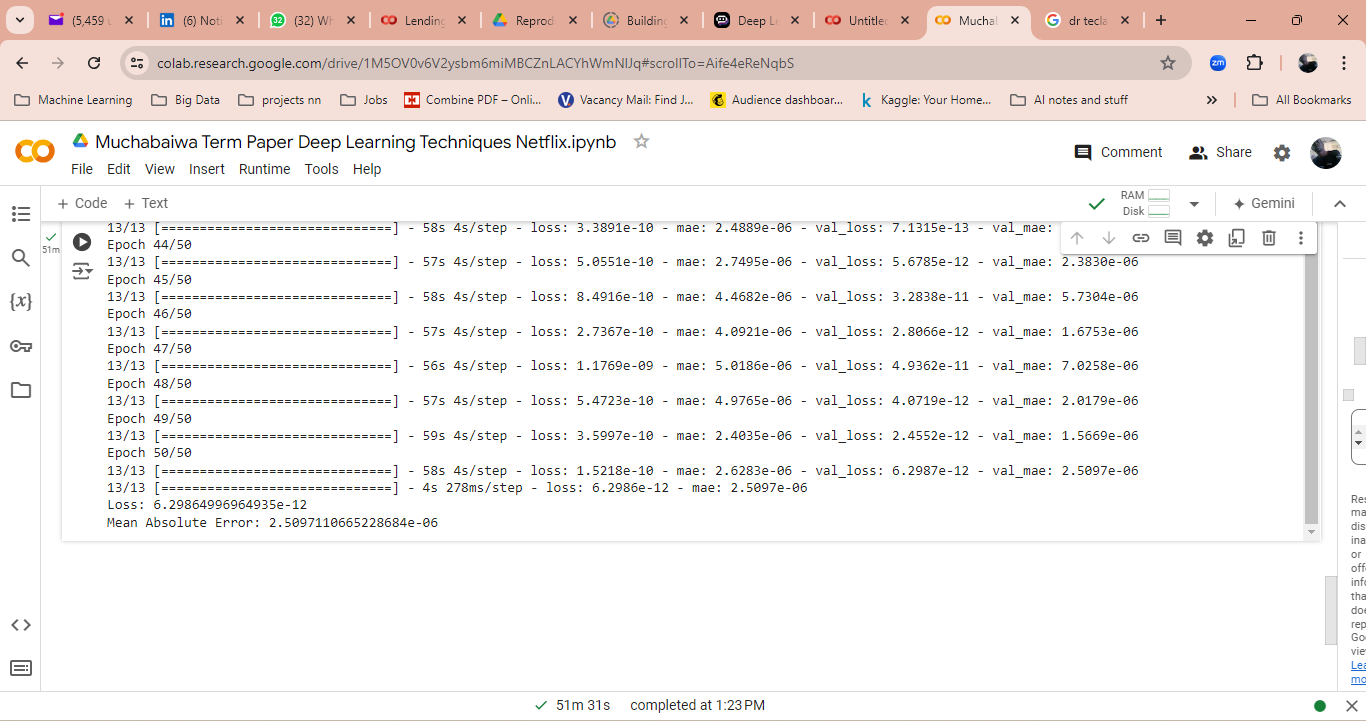

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load the data
df = pd.read_csv('netflix_titles2.csv')
def preprocess_text(input_text, filters, lower=True):
    """
    Preprocess the input text by converting it to lowercase and removing specified characters.

    Args:
        input_text (str): The input text to be preprocessed.
        filters (list): A list of characters to be removed from the input text.
        lower (bool, optional): Whether to convert the input text to lowercase. Defaults to True.

    Returns:
        str: The preprocessed input text.
    """
    if isinstance(input_text, str):  # Check if input_text is a string
        if lower:
            input_text = input_text.lower()

        translate_dict = {c: split for c in filters}
        input_text = input_text.translate(str.maketrans(translate_dict))

        return input_text
    else:
        print(f"Error: input_text is not a string, it's a {type(input_text)}.")
        return input_text

# Preprocess the data
df['show_id'] = df['show_id'].astype(str)
df['type'] = df['type'].astype(str)
df['release_year'] = df['release_year'].astype(str)

# Handle non-numeric 'rating' column
# Assuming 'rating' contains categories, we'll use LabelEncoder
le = LabelEncoder()
df['rating'] = le.fit_transform(df['rating'])

# Ensure 'title' column is of type string
df['title'] = df['title'].astype(str) # Convert the 'title' column to string type

# Tokenize and pad text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['title'])
sequences = tokenizer.texts_to_sequences(df['title'])
padded_sequences = pad_sequences(sequences) # Create padded sequences

# Use one-hot encoding for categorical features
show_id_dummies = pd.get_dummies(df['show_id'], prefix='show_id')
type_dummies = pd.get_dummies(df['type'], prefix='type')
release_year_dummies = pd.get_dummies(df['release_year'], prefix='release_year')

# Concatenate features
X = pd.concat([pd.DataFrame(padded_sequences), show_id_dummies, type_dummies, release_year_dummies], axis=1)
# Convert all features to float32
X = X.astype('float32') # Convert all data to float type

y = df['rating'].astype('float32')  # Convert the target variable to float32

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=padded_sequences.shape[1])) # Use correct input_length
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Mean Absolute Error:', mae)

Epoch 1/50
13/13 [==============================] - 66s 5s/step - loss: 2.3478e-05 - mae: 0.0035 - val_loss: 1.1019e-06 - val_mae: 0.0010
Epoch 2/50
13/13 [==============================] - 60s 5s/step - loss: 1.7154e-06 - mae: 0.0010 - val_loss: 3.3383e-10 - val_mae: 1.8258e-05
Epoch 3/50
13/13 [==============================] - 59s 5s/step - loss: 2.2936e-07 - mae: 3.5567e-04 - val_loss: 2.2415e-08 - val_mae: 1.4972e-04
Epoch 4/50
13/13 [==============================] - 60s 5s/step - loss: 5.3446e-08 - mae: 1.4629e-04 - val_loss: 2.6127e-09 - val_mae: 5.1115e-05
Epoch 5/50
13/13 [==============================] - 63s 5s/step - loss: 2.4690e-08 - mae: 9.4022e-05 - val_loss: 3.9446e-10 - val_mae: 1.9861e-05
Epoch 6/50
13/13 [==============================] - 58s 5s/step - loss: 1.3995e-08 - mae: 4.9163e-05 - val_loss: 4.3330e-10 - val_mae: 2.0816e-05
Epoch 7/50
13/13 [==============================] - 60s 5s/step - loss: 1.0649e-08 - mae: 3.8035e-05 - val_loss: 7.1777e-12 - val_mae: 2